In [1]:
import pandas as pd
import geopandas as gpd

import os

import contextily as ctx
import matplotlib.pyplot as plt
%matplotlib inline

## Local Authorities: Downloaded dataset

https://geoportal.statistics.gov.uk/datasets/local-athority-districts-december-2018-boundaries-gb-bfc

In [2]:
la = gpd.read_file("../data/raw/la")

In [3]:
la.head()

objectid    lad18cd              lad18nm lad18nmw   bng_e   bng_n     long  \
0       277  E08000021  Newcastle upon Tyne     None  422287  569662 -1.65297   

      lat    st_area(sh    st_length(  \
0  55.021  1.134562e+08  65248.297409   

                                            geometry  
0  POLYGON ((423225.702 574536.300, 423221.497 57...

(413668.5646349999, 430906.33826500014, 562231.6428599999, 576823.3549400003)

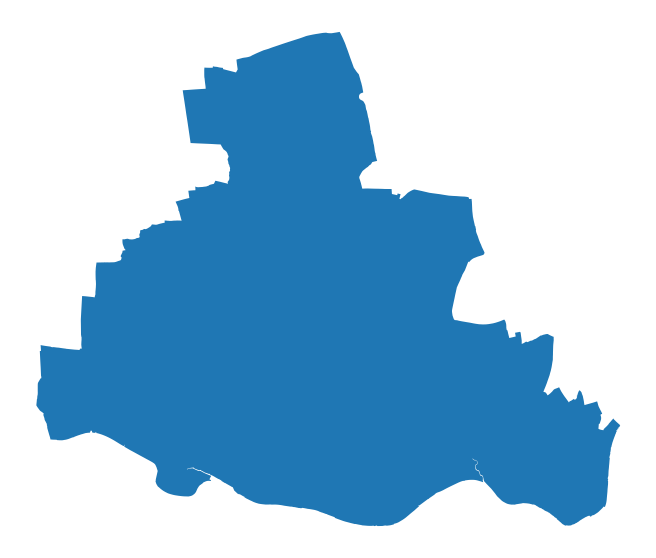

In [4]:
la.plot(cmap='tab20', figsize=(20,10))
plt.axis('off')

## Output Areas: Downloaded dataset
https://geoportal.statistics.gov.uk/datasets/output-area-december-2011-full-clipped-boundaries-in-england-and-wales?geometry=-1.623%2C54.976%2C-1.600%2C54.980

In [5]:
oa = gpd.read_file("../data/raw/oa")

In [6]:
oa.head()

objectid     oa11cd    lad11cd    st_areasha   st_lengths  \
0         1  E00000001  E09000001   6707.114639   448.117955   
1         2  E00000003  E09000001   4186.859841   341.806167   
2         3  E00000005  E09000001   8736.114423   444.386358   
3         4  E00000007  E09000001  73494.467622  1607.081131   
4         5  E00000010  E09000001   2533.057603   259.046872   

                                            geometry  
0  POLYGON ((532303.125 181877.594, 532301.345 18...  
1  POLYGON ((532198.818 181863.087, 532192.305 18...  
2  POLYGON ((532178.979 181764.041, 532180.131 18...  
3  POLYGON ((532201.292 181668.180, 532205.000 18...  
4  POLYGON ((532127.958 182133.192, 532106.413 18...

(54025.36499999999, 684251.3350000002, -27271.9100499996, 690143.9110499998)

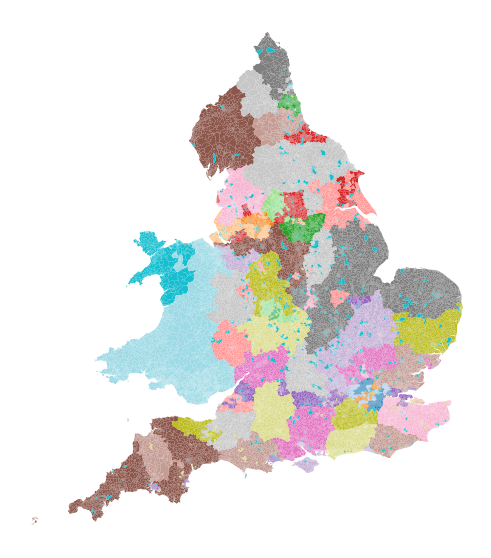

In [7]:
oa.plot(cmap='tab20', figsize=(20,10))
plt.axis('off')

## Newcastle upon Tyne Local Authority

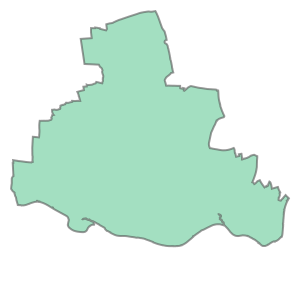

In [8]:
tyne_la = la[la["lad18nm"] == "Newcastle upon Tyne"].iloc[0]
tyne_la["geometry"]

## Output areas intersecting Newcastle Upon Tyne Local Authority

In [23]:
tyne_oa = oa[oa.intersects(tyne_la["geometry"])]

objectid     oa11cd    lad11cd     st_areasha   st_lengths  \
40743      40744  E00042042  E08000021   70646.968938  2005.364898   
40744      40745  E00042043  E08000021   46610.454211  1328.957568   
40745      40746  E00042044  E08000021   58693.069365  1663.764939   
40746      40747  E00042045  E08000021   21401.770445   712.782318   
40747      40748  E00042046  E08000021  149085.377199  2866.342992   
...          ...        ...        ...            ...          ...   
170198    170199  E00175601  E08000021   19054.457487   866.333115   
170199    170200  E00175602  E08000021   21193.797911   931.433792   
170200    170201  E00175603  E08000021   36882.290258  1200.129545   
170201    170202  E00175604  E08000021   36758.130698   994.619451   
170202    170203  E00175605  E08000021  153227.190770  1901.509233   

                                                 geometry  
40743   POLYGON ((421301.772 564928.429, 421301.755 56...  
40744   POLYGON ((420572.364 564892.821, 420572.312 56...  
40745   POLYGON ((420492.559 564780.806, 420492.590 56...  
40746   POLYGON ((421543.715 563955.116, 421542.251 56...  
40747   POLYGON ((422292.813 563736.716, 422265.374 56...  
...                                                   ...  
170198  POLYGON ((427639.103 567072.346, 427638.375 56...  
170199  POLYGON ((421579.281 567363.000, 421581.156 56...  
170200  POLYGON ((421751.129 567264.313, 421719.882 56...  
170201  POLYGON ((421885.267 567295.251, 421882.409 56...  
170202  POLYGON ((423589.243 571950.505, 423607.131 57...  

[952 rows x 6 columns]

Captured output areas compared with local authority boundary:

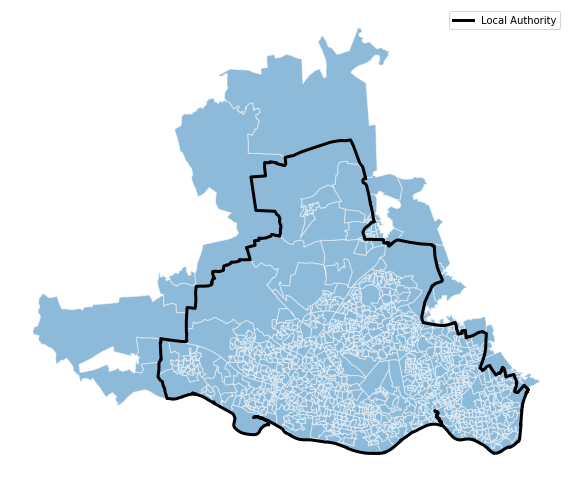

In [24]:
ax = plt.figure(figsize=(10,10)).gca()
x,y = tyne_la["geometry"].exterior.xy
ax.plot(x,y, 'k', linewidth=3)
tyne_oa.plot(alpha=0.5, ax=ax, edgecolor='white')
plt.axis('off')
plt.legend(["Local Authority"])

objectid     oa11cd    lad11cd    st_areasha   st_lengths  \
136057    136058  E00139821  E06000048  2.190827e+07  35667.40814   

                                                 geometry  
136057  POLYGON ((423136.758 574916.867, 423133.555 57...

## With a base map (contextily)

https://geopandas.readthedocs.io/en/latest/gallery/plotting_basemap_background.html

Alternative map tiles:
https://wiki.openstreetmap.org/wiki/Tile_servers

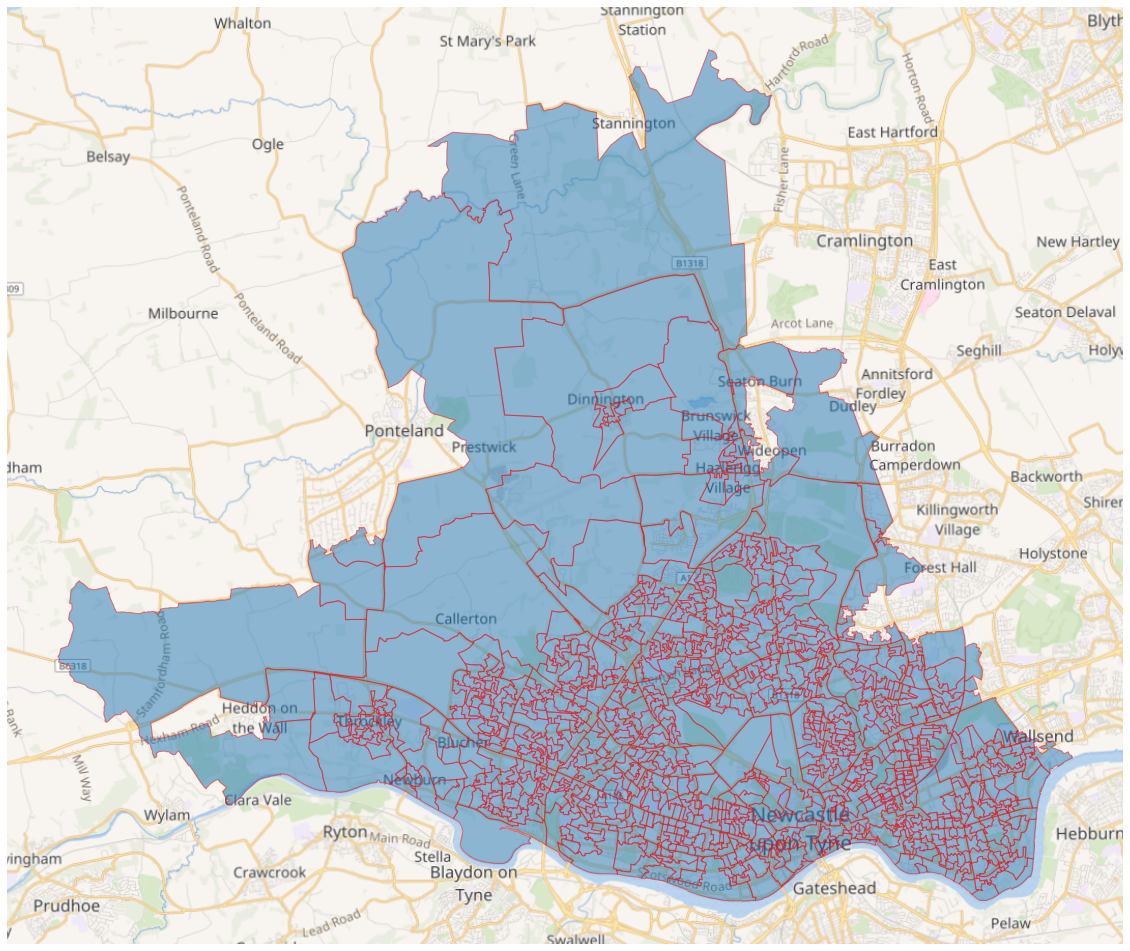

In [11]:
ax = tyne_oa.plot(figsize=(20,20),alpha=0.5, edgecolor="red")
ctx.add_basemap(ax,
                url="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)
ax.set_axis_off()

## Population Centroids
https://geoportal.statistics.gov.uk/datasets/output-areas-december-2011-population-weighted-centroids?geometry=-1.806%2C54.947%2C-1.440%2C55.016

In [21]:
centroids = gpd.read_file("../data/raw/centroids")
centroids["X"] = centroids.geometry.x
centroids["Y"] = centroids.geometry.y
centroids.head()

objectid     oa11cd                       geometry           X           Y
0     30454  E00139972  POINT (408618.737 562445.884)  408618.737  562445.884
1     30457  E00139970  POINT (409326.440 562881.452)  409326.440  562881.452
2     30460  E00139976  POINT (408750.916 562433.097)  408750.916  562433.097
3     30462  E00139977  POINT (408625.569 562226.199)  408625.569  562226.199
4     30463  E00139974  POINT (408975.600 562697.257)  408975.600  562697.257

## Population Estimates
https://www.ons.gov.uk/peoplepopulationandcommunity/populationandmigration/populationestimates/datasets/censusoutputareaestimatesinthenortheastregionofengland

In [15]:
populations = pd.read_csv("../data/raw/populations.csv")
populations.head()

OA11CD   LSOA11CD  Population
0  E00041378  E01008162         292
1  E00041381  E01008162         268
2  E00041382  E01008162         171
3  E00041383  E01008162         350
4  E00041386  E01008162         568

/Users/jroberts/opt/anaconda3/envs/spatial-inequality/lib/python3.7/site-packages/pyproj/crs.py:77: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method.
  return _prepare_from_string(" ".join(pjargs))


FID     OA11CD    LAD11CD     Shape__Are   Shape__Len  \
479  40744  E00042042  E08000021  214155.744629  3492.481236   
480  40745  E00042043  E08000021  141302.081299  2314.149469   
481  40746  E00042044  E08000021  177916.885864  2895.815514   
482  40747  E00042045  E08000021   64858.009033  1241.047878   
483  40748  E00042046  E08000021  451704.930298  4988.032102   

                                              geometry      area  
479  POLYGON ((421301.772 564928.429, 421301.755 56...  0.070647  
480  POLYGON ((420572.364 564892.821, 420572.312 56...  0.046610  
481  POLYGON ((420492.559 564780.806, 420492.590 56...  0.058693  
482  POLYGON ((421543.715 563955.116, 421542.251 56...  0.021402  
483  POLYGON ((422292.813 563736.716, 422265.374 56...  0.149085

count    952.000000
mean       0.192458
std        1.174424
min        0.001419
25%        0.036030
50%        0.053451
75%        0.086122
max       21.908268
Name: area, dtype: float64

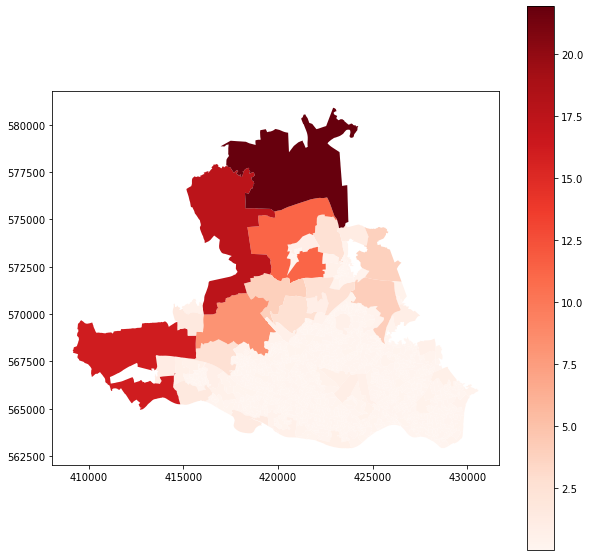

In [16]:
tyne_oa_crs = tyne_oa.to_crs(tyne_oa.crs)
tyne_oa_crs["area"] = tyne_oa_crs['geometry'].area/ 10**6
display(tyne_oa_crs.head())

display(tyne_oa_crs["area"].describe())

tyne_oa_crs.plot(column="area",
                 cmap="Reds",
                 figsize=(10,10),
                 legend=True)

In [25]:
ne_pop_with_centroids = centroids.merge(populations, left_on='oa11cd', right_on='OA11CD')
ne_pop_with_centroids.drop("OA11CD", axis=1, inplace=True)
ne_pop_with_centroids.head()

objectid     oa11cd                       geometry           X           Y  \
0     30454  E00139972  POINT (408618.737 562445.884)  408618.737  562445.884   
1     30457  E00139970  POINT (409326.440 562881.452)  409326.440  562881.452   
2     30460  E00139976  POINT (408750.916 562433.097)  408750.916  562433.097   
3     30462  E00139977  POINT (408625.569 562226.199)  408625.569  562226.199   
4     30463  E00139974  POINT (408975.600 562697.257)  408975.600  562697.257   

    LSOA11CD  Population  
0  E01027502         307  
1  E01027500         217  
2  E01027502         279  
3  E01027502         298  
4  E01027501         251

In [32]:
tyne_oa = tyne_oa.merge(ne_pop_with_centroids[["X", "Y", "oa11cd", "Population"]],
                        how="left", right_on="oa11cd", left_on="OA11CD")


tyne_oa.head()

FID     OA11CD    LAD11CD     Shape__Are   Shape__Len  \
0  40744  E00042042  E08000021  214155.744629  3492.481236   
1  40745  E00042043  E08000021  141302.081299  2314.149469   
2  40746  E00042044  E08000021  177916.885864  2895.815514   
3  40747  E00042045  E08000021   64858.009033  1241.047878   
4  40748  E00042046  E08000021  451704.930298  4988.032102   

                                            geometry           X           Y  \
0  POLYGON ((421301.772 564928.429, 421301.755 56...  421259.393  564639.754   
1  POLYGON ((420572.364 564892.821, 420572.312 56...  420448.616  564819.213   
2  POLYGON ((420492.559 564780.806, 420492.590 56...  420509.207  564622.209   
3  POLYGON ((421543.715 563955.116, 421542.251 56...  421551.722  564088.460   
4  POLYGON ((422292.813 563736.716, 422265.374 56...  422116.597  563648.529   

      oa11cd  Population  
0  E00042042       310.0  
1  E00042043       304.0  
2  E00042044       246.0  
3  E00042045       201.0  
4  E00042046       424.0

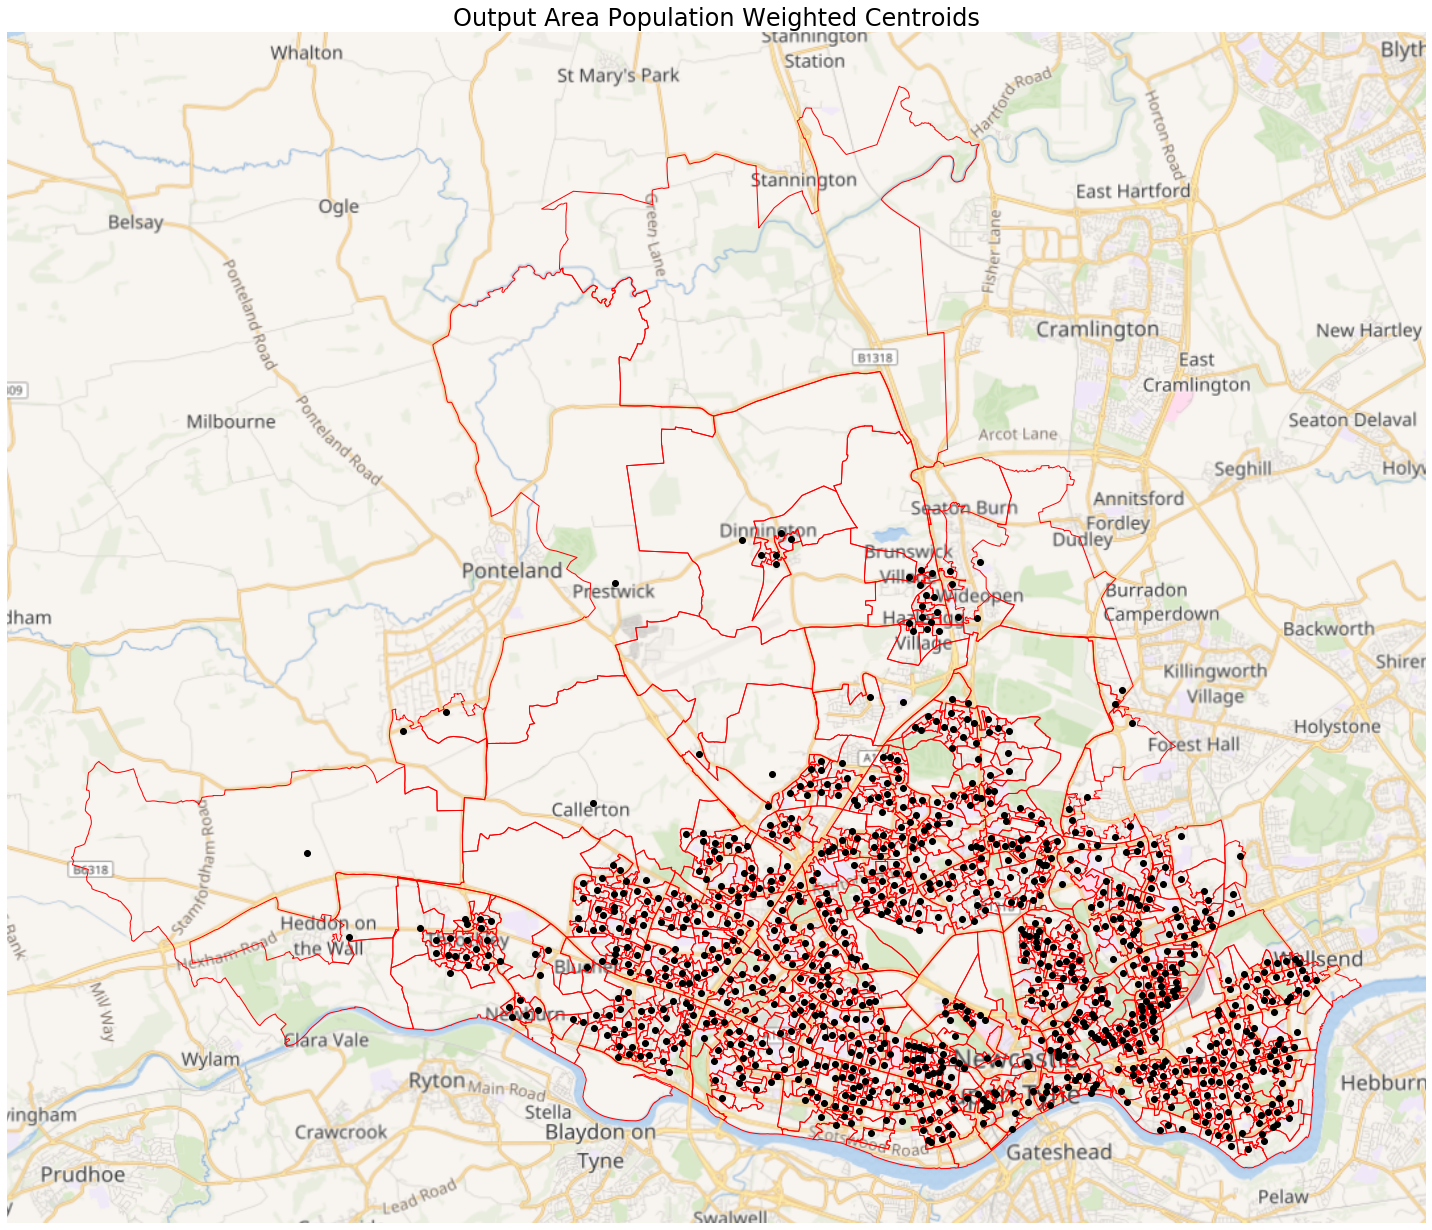

In [34]:
ax = tyne_oa.plot(figsize=(20,20), facecolor='none', edgecolor='red', linewidth=1)
ctx.add_basemap(ax,
                url="https://maps.wikimedia.org/osm-intl/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)

x = tyne_oa["X"].values
y = tyne_oa["Y"].values
ax.scatter(x, y, color='k')

ax.set_axis_off()
plt.title("Output Area Population Weighted Centroids", fontsize=24)

#plt.tight_layout()
#plt.savefig("../data/img/oa_centroids.png", dpi=300)

## Density

In [ ]:
tyne_oa["density"] = tyne_oa["Population"] / tyne_oa["geometry"].area

# binned by decile
tyne_oa["density_bin"] = pd.qcut(tyne_oa["density"], q=10)

In [ ]:
ax = tyne_oa.plot(column="density_bin",
                  figsize=(20,20),alpha=0.75,
                  cmap="YlGnBu", legend=True)

ctx.add_basemap(ax,
                url="http://a.tile.stamen.com/toner/{z}/{x}/{y}.png",
                crs=tyne_oa.crs)

ax.set_axis_off()

## Save dataframe

In [ ]:
select_cols = ["oa11cd", "lad11cd", "geometry", "X", "Y", "Population"]
save_dir = "../data/processed/tyne_oa"

os.makedirs(save_dir, exist_ok=True)

tyne_oa[select_cols].to_file(save_dir + "/tyne_oa.shp")

In [ ]:
la.to_crs(epsg=27700, inplace=True)

In [ ]:
la.crs